In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [9]:
from google.colab import files

uploaded = files.upload()

Saving student_performance_Mini_project_5.csv to student_performance_Mini_project_5.csv


In [10]:
# Assuming the file is uploaded, let's now try to read it
for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')
  df = pd.read_csv(fn)

display(df.head())

User uploaded file "student_performance_Mini_project_5.csv" with length 717 bytes


,Student_ID,Gender,Study_Hours,Attendance,Internal_Marks,Assignment_Score,Midterm_Score,Final_Score,Final_Result
0,1,Male,2,65,12,10,22,44,Fail
1,2,Female,4,80,20,16,35,71,Pass
2,3,Male,1,55,10,8,18,36,Fail
3,4,Female,6,90,25,18,42,85,Pass
4,5,Male,3,70,15,12,28,55,Pass


In [11]:
df.isnull().sum()

,0
Student_ID,0
Gender,0
Study_Hours,0
Attendance,0
Internal_Marks,0
Assignment_Score,0
Midterm_Score,0
Final_Score,0
Final_Result,0


In [12]:
le_gender = LabelEncoder()
le_result = LabelEncoder()

df["Gender"] = le_gender.fit_transform(df["Gender"])
df["Final_Result"] = le_result.fit_transform(df["Final_Result"])

df

,Student_ID,Gender,Study_Hours,Attendance,Internal_Marks,Assignment_Score,Midterm_Score,Final_Score,Final_Result
0,1,1,2,65,12,10,22,44,0
1,2,0,4,80,20,16,35,71,1
2,3,1,1,55,10,8,18,36,0
3,4,0,6,90,25,18,42,85,1
4,5,1,3,70,15,12,28,55,1
5,6,0,5,85,22,17,40,79,1
6,7,1,2,60,13,11,24,48,0
7,8,0,7,95,28,19,45,92,1
8,9,1,4,75,18,14,32,64,1
9,10,0,1,50,9,7,15,31,0


In [13]:
X = df.drop(["Student_ID", "Final_Result"], axis=1)
y = df["Final_Result"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state = 42
)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy * 100, "%")

Model Accuracy: 100.0 %


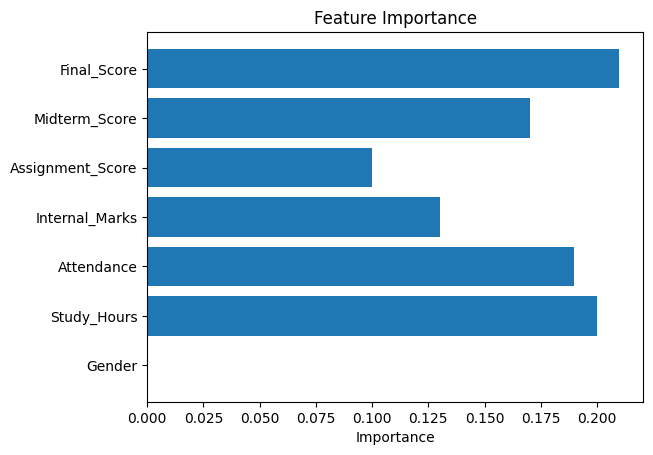

In [17]:
importance = model.feature_importances_
features = X.columns

plt.barh(features, importance)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()

In [18]:
new_student = pd.DataFrame([{
    "Gender": 1,
    "Study_Hours": 4,
    "Attendance": 78,
    "Internal_Marks": 18,
    "Assignment_Score": 14,
    "Midterm_Score": 32,
    "Final_Score": 65
}])

prediction = model.predict(new_student)
probability = model.predict_proba(new_student)

result = "Pass" if prediction[0] == 1 else "Fail"

print("Prediction:", result)
print("Probability [Fail, Pass]:", probability)

Prediction: Pass
Probability [Fail, Pass]: [[0. 1.]]


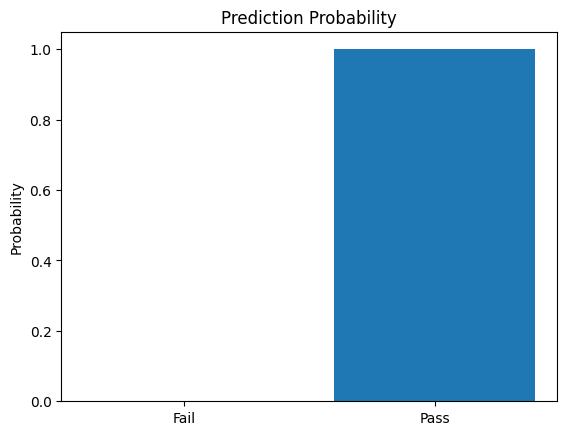

In [19]:
labels = ["Fail", "Pass"]
plt.bar(labels, probability[0])
plt.title("Prediction Probability")
plt.ylabel("Probability")
plt.show()